In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

import pandas as pd
from datetime import datetime

import os
import ipywidgets as widgets

import tkinter as tk
from tkinter import filedialog as fd

In [2]:
# open file dialog
root = tk.Tk()
root.attributes('-topmost', True)
root.iconify()
file_name = fd.askopenfilename(parent=root, filetypes=[(".shp", ".shp")])
root.destroy()

In [3]:
file_name

'D:/BISMARK/GESTION_2023/_CATASTRO/2022-12-03.shp'

In [4]:
# leer el .shp seleccionado
data = gpd.read_file(file_name)

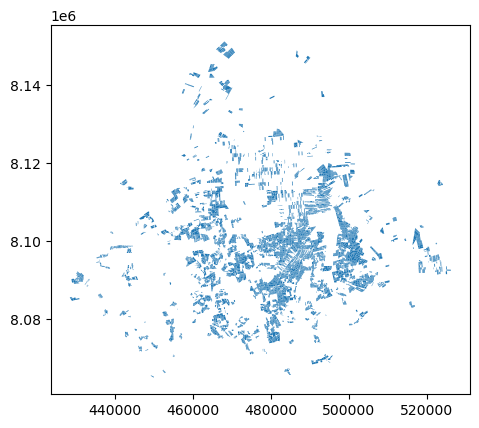

In [5]:
data.plot()
plt.show()

In [6]:
data.crs.name

'WGS 84 / UTM zone 20S'

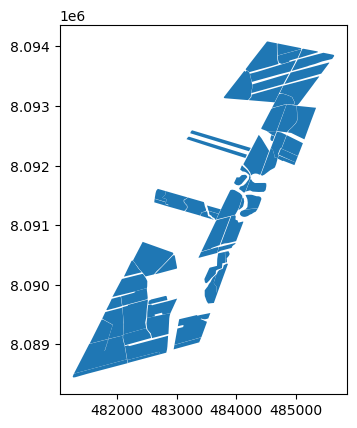

In [7]:
propiedad = data[data['unidad_01']==19]
propiedad.plot()
plt.show()

In [8]:
propiedad.head(3)

,id,area,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,textura,financia,soca,cultivo,zona,mark,geometry
1082,0000190000L11.2,13.59,19,SANTA_BARBARA,388,AGROPECUARIA_MARIANA_S.R.L.,L11.2,SP 83-5073,2019-08-01,FY,IAG,3,canha,69,NaN,"POLYGON Z ((485025.015 8092885.836 0.000, 4850..."
1083,0000190000L11.1,10.20,19,SANTA_BARBARA,388,AGROPECUARIA_MARIANA_S.R.L.,L11.1,SP 83-5073,2019-08-01,FY,IAG,3,canha,69,NaN,"POLYGON Z ((484686.951 8092584.984 0.000, 4848..."
1084,0000190000L15,15.94,19,SANTA_BARBARA,18358,ROJAS_AMELUNGE_CARLOS,L15,CITTCA 85-22,2014-04-20,F,None,8,canha,69,NaN,"POLYGON Z ((484120.740 8092021.415 0.000, 4843..."


In [9]:
file_name = str(propiedad.iloc[0]['unidad_01']) + '_' + propiedad.iloc[0]['unidad_02']

In [10]:
propiedad = propiedad.rename(columns={'id':'cod', 'variedad':'var', 'textura':'tex'})
propiedad.head(5)

,cod,area,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,var,fs,tex,financia,soca,cultivo,zona,mark,geometry
1082,0000190000L11.2,13.59,19,SANTA_BARBARA,388,AGROPECUARIA_MARIANA_S.R.L.,L11.2,SP 83-5073,2019-08-01,FY,IAG,3,canha,69,NaN,"POLYGON Z ((485025.015 8092885.836 0.000, 4850..."
1083,0000190000L11.1,10.20,19,SANTA_BARBARA,388,AGROPECUARIA_MARIANA_S.R.L.,L11.1,SP 83-5073,2019-08-01,FY,IAG,3,canha,69,NaN,"POLYGON Z ((484686.951 8092584.984 0.000, 4848..."
1084,0000190000L15,15.94,19,SANTA_BARBARA,18358,ROJAS_AMELUNGE_CARLOS,L15,CITTCA 85-22,2014-04-20,F,None,8,canha,69,NaN,"POLYGON Z ((484120.740 8092021.415 0.000, 4843..."
1085,0000190000L19.3,4.77,19,SANTA_BARBARA,388,AGROPECUARIA_MARIANA_S.R.L.,L19.3,UCG 96-10,2022-04-13,FY,IAG,0,canha,69,NaN,"POLYGON Z ((484314.922 8091706.924 0.000, 4844..."
1086,0000190000L30.2,8.16,19,SANTA_BARBARA,18358,ROJAS_AMELUNGE_CARLOS,L30.2,CITTCA 85-22,2016-03-15,F,None,6,canha,69,NaN,"POLYGON Z ((481929.593 8089327.610 0.000, 4818..."


In [11]:
num_columnas = len(propiedad.columns)
num_columnas

16

In [12]:
propiedad['NOM_LOTE'] = propiedad['unidad_05']
propiedad['TEXTURA'] = propiedad['tex']
propiedad['SUPERFICIE'] = propiedad['area']
propiedad['VARIEDAD'] = propiedad['var']
propiedad['FECHA_SIEM'] = propiedad['fs']
propiedad['CORTE'] = propiedad['soca']
propiedad['ESTADO'] = ''
propiedad['RENDIMIENT'] = 0
propiedad['COD_CA'] = propiedad['unidad_03']
propiedad['COD_PROP'] = propiedad['unidad_01']
propiedad['ID'] = propiedad['cod']
propiedad['CUADRANTE'] = 0

In [13]:
propiedad.head(3)

,cod,area,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,var,fs,tex,...,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
1082,0000190000L11.2,13.59,19,SANTA_BARBARA,388,AGROPECUARIA_MARIANA_S.R.L.,L11.2,SP 83-5073,2019-08-01,FY,...,13.59,SP 83-5073,2019-08-01,3,,0,388,19,0000190000L11.2,0
1083,0000190000L11.1,10.20,19,SANTA_BARBARA,388,AGROPECUARIA_MARIANA_S.R.L.,L11.1,SP 83-5073,2019-08-01,FY,...,10.20,SP 83-5073,2019-08-01,3,,0,388,19,0000190000L11.1,0
1084,0000190000L15,15.94,19,SANTA_BARBARA,18358,ROJAS_AMELUNGE_CARLOS,L15,CITTCA 85-22,2014-04-20,F,...,15.94,CITTCA 85-22,2014-04-20,8,,0,18358,19,0000190000L15,0


In [14]:
propiedad.columns

Index(['cod', 'area', 'unidad_01', 'unidad_02', 'unidad_03', 'unidad_04',
       'unidad_05', 'var', 'fs', 'tex', 'financia', 'soca', 'cultivo', 'zona',
       'mark', 'geometry', 'NOM_LOTE', 'TEXTURA', 'SUPERFICIE', 'VARIEDAD',
       'FECHA_SIEM', 'CORTE', 'ESTADO', 'RENDIMIENT', 'COD_CA', 'COD_PROP',
       'ID', 'CUADRANTE'],
      dtype='object')

In [15]:
propiedad = propiedad.iloc[:,num_columnas-1:]

In [16]:
propiedad.head(5)

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
1082,"POLYGON Z ((485025.015 8092885.836 0.000, 4850...",L11.2,FY,13.59,SP 83-5073,2019-08-01,3,,0,388,19,0000190000L11.2,0
1083,"POLYGON Z ((484686.951 8092584.984 0.000, 4848...",L11.1,FY,10.20,SP 83-5073,2019-08-01,3,,0,388,19,0000190000L11.1,0
1084,"POLYGON Z ((484120.740 8092021.415 0.000, 4843...",L15,F,15.94,CITTCA 85-22,2014-04-20,8,,0,18358,19,0000190000L15,0
1085,"POLYGON Z ((484314.922 8091706.924 0.000, 4844...",L19.3,FY,4.77,UCG 96-10,2022-04-13,0,,0,388,19,0000190000L19.3,0
1086,"POLYGON Z ((481929.593 8089327.610 0.000, 4818...",L30.2,F,8.16,CITTCA 85-22,2016-03-15,6,,0,18358,19,0000190000L30.2,0


In [17]:
# dependiendo del año de la fecha de siembra, retorna 'HOJA', 'SOCA' o 'RENOVACION'
def establecer_estado(fecha):
    date = str(fecha)
    try:
        date = datetime.strptime(date, '%Y-%m-%d')
        year = date.year
        if year == 2022:
            return 'HOJA'
        else:
            return 'SOCA'
    except Exception as ex:
        return 'RENOVACION'

In [18]:
def establecer_formato_fecha(fecha):
    fecha = str(fecha)
    if fecha == 'None':
        return '0'
    else:
        return fecha.replace('-', '')

In [19]:
propiedad['ESTADO'] = propiedad['FECHA_SIEM'].apply(establecer_estado)
propiedad['FECHA_SIEM'] = propiedad['FECHA_SIEM'].apply(establecer_formato_fecha)

In [20]:
propiedad.head()

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
1082,"POLYGON Z ((485025.015 8092885.836 0.000, 4850...",L11.2,FY,13.59,SP 83-5073,20190801,3,SOCA,0,388,19,0000190000L11.2,0
1083,"POLYGON Z ((484686.951 8092584.984 0.000, 4848...",L11.1,FY,10.20,SP 83-5073,20190801,3,SOCA,0,388,19,0000190000L11.1,0
1084,"POLYGON Z ((484120.740 8092021.415 0.000, 4843...",L15,F,15.94,CITTCA 85-22,20140420,8,SOCA,0,18358,19,0000190000L15,0
1085,"POLYGON Z ((484314.922 8091706.924 0.000, 4844...",L19.3,FY,4.77,UCG 96-10,20220413,0,HOJA,0,388,19,0000190000L19.3,0
1086,"POLYGON Z ((481929.593 8089327.610 0.000, 4818...",L30.2,F,8.16,CITTCA 85-22,20160315,6,SOCA,0,18358,19,0000190000L30.2,0


In [21]:
fp_tch = r'D:\OneDrive - Ingenio Azucarero Guabira S.A\UTEA_2022\APP CAÑERO\PROPIEDADES\DATOS_PARA_GENERAR_GEOJSON\RENDIMIENTO AVANCE 071022.xlsx'

In [22]:
tchs = pd.read_excel(fp_tch)

In [23]:
def cargar_tch(cod_ca):
    tch = float(tchs[tchs['CODIGO CAÑERO '] == cod_ca].iloc[:,16])
    try:
        tch_float = float(tch)
        return tch_float
    except:
        return 0

In [24]:
propiedad['RENDIMIENT'] = propiedad['COD_CA'].apply(cargar_tch)
propiedad.head(3)

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
1082,"POLYGON Z ((485025.015 8092885.836 0.000, 4850...",L11.2,FY,13.59,SP 83-5073,20190801,3,SOCA,60.460926,388,19,0000190000L11.2,0
1083,"POLYGON Z ((484686.951 8092584.984 0.000, 4848...",L11.1,FY,10.20,SP 83-5073,20190801,3,SOCA,60.460926,388,19,0000190000L11.1,0
1084,"POLYGON Z ((484120.740 8092021.415 0.000, 4843...",L15,F,15.94,CITTCA 85-22,20140420,8,SOCA,60.460926,18358,19,0000190000L15,0


In [25]:
fp_bloques = r'D:\OneDrive - Ingenio Azucarero Guabira S.A\UTEA_2022\APP CAÑERO\PROPIEDADES\DATOS_PARA_GENERAR_GEOJSON\BLOQUES.xlsx'

In [26]:
bloques = pd.read_excel(fp_bloques)

In [27]:
bloques.head(3)

,idnax,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,fc,...,agua_disp,agua_aprov,agua_act,estrato,tipo_cos,resiembra_pct,fk_pixel,activo,fk_estacion,inicio_curva
0,276044,00005600000L1.3,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.3,UCG_90-20,44038,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,618227,True,NaN,NaN
1,276045,00005600000L1.5,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.5,UCG_90-20,44431,44431.0,...,NaN,NaN,NaN,NaN,NaN,NaN,618227,True,NaN,NaN
2,276046,00005600000L2.2,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L2.2,CITTCA_85-22,44431,44431.0,...,NaN,NaN,NaN,NaN,NaN,NaN,618227,True,NaN,NaN


In [28]:
def cargar_bloque(cod_prop):
    bloque = bloques[bloques['unidad_01']==cod_prop].head(1).loc[:,'cuadrante']
    try:
        bloque_int = int(bloque)
        return bloque_int
    except:
        return 0

In [29]:
propiedad['CUADRANTE']=propiedad['COD_PROP'].apply(cargar_bloque)
propiedad.head(3)

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
1082,"POLYGON Z ((485025.015 8092885.836 0.000, 4850...",L11.2,FY,13.59,SP 83-5073,20190801,3,SOCA,60.460926,388,19,0000190000L11.2,359
1083,"POLYGON Z ((484686.951 8092584.984 0.000, 4848...",L11.1,FY,10.20,SP 83-5073,20190801,3,SOCA,60.460926,388,19,0000190000L11.1,359
1084,"POLYGON Z ((484120.740 8092021.415 0.000, 4843...",L15,F,15.94,CITTCA 85-22,20140420,8,SOCA,60.460926,18358,19,0000190000L15,359


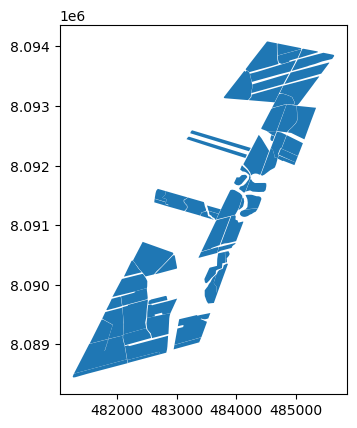

In [30]:
propiedad.plot()
plt.show()

In [31]:
propiedad.crs

<Projected CRS: EPSG:32720>
Name: WGS 84 / UTM zone 20S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 66°W and 60°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Falkland Islands (Malvinas). Paraguay.
- bounds: (-66.0, -80.0, -60.0, 0.0)
Coordinate Operation:
- name: UTM zone 20S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [32]:
propiedad = propiedad.to_crs(epsg=4326)

In [33]:
propiedad.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [34]:
file_name + '.geojson'

'19_SANTA_BARBARA.geojson'

In [35]:
os.chdir(r"D:\OneDrive - Ingenio Azucarero Guabira S.A\UTEA_2022\APP CAÑERO\PROPIEDADES\DATOS_PARA_GENERAR_GEOJSON\SPH_WGS84")

In [36]:
out_dir = os.path.normpath((os.getcwd() + '/' + file_name + '.geojson' ))

In [37]:
out_dir

'D:\\OneDrive - Ingenio Azucarero Guabira S.A\\UTEA_2022\\APP CAÑERO\\PROPIEDADES\\DATOS_PARA_GENERAR_GEOJSON\\SPH_WGS84\\19_SANTA_BARBARA.geojson'

In [38]:
propiedad.to_file(out_dir, driver='GeoJSON')